In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

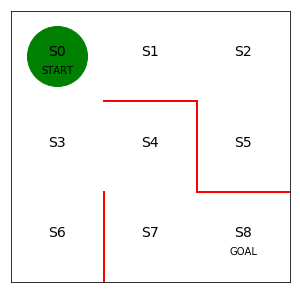

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                  [np.nan, 1, np.nan, 1],
                  [np.nan, np.nan, 1, 1],
                  [1, 1, 1, np.nan],
                  [np.nan, np.nan, 1, 1],
                  [1, np.nan, np.nan, np.nan],
                  [1, np.nan, np.nan, np.nan],
                  [1, 1, np.nan, np.nan],
                  ])

In [4]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [5]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

In [6]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [7]:
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

In [8]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
    
    return s_next

In [9]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    
    return Q

In [10]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while (1):
        a = a_next
        
        s_a_history[-1][1] = a
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
        
    return [s_a_history, Q]

In [11]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print("Episode: " + str(episode))
    
    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    
    episode = episode + 1
    if episode > 100:
        break

Episode: 1
1.0433982676997875
迷路を解くのにかかったステップ数は130です
Episode: 2
0.0788813698440115
迷路を解くのにかかったステップ数は6です
Episode: 3
0.059886780221067415
迷路を解くのにかかったステップ数は4です
Episode: 4
0.05243207989117621
迷路を解くのにかかったステップ数は4です
Episode: 5
0.0501540155434797
迷路を解くのにかかったステップ数は4です
Episode: 6
0.049424881762179906
迷路を解くのにかかったステップ数は4です
Episode: 7
0.04887184966631486
迷路を解くのにかかったステップ数は4です
Episode: 8
0.04826467697599107
迷路を解くのにかかったステップ数は4です
Episode: 9
0.04761056835881733
迷路を解くのにかかったステップ数は4です
Episode: 10
0.046914364691233945
迷路を解くのにかかったステップ数は4です
Episode: 11
0.046179328160510735
迷路を解くのにかかったステップ数は4です
Episode: 12
0.045407731748805136
迷路を解くのにかかったステップ数は4です
Episode: 13
0.044601292975034734
迷路を解くのにかかったステップ数は4です
Episode: 14
0.04376148465306251
迷路を解くのにかかったステップ数は4です
Episode: 15
0.04288974946576096
迷路を解くのにかかったステップ数は4です
Episode: 16
0.041987640177665875
迷路を解くのにかかったステップ数は4です
Episode: 17
0.04105690316340915
迷路を解くのにかかったステップ数は4です
Episode: 18
0.04009951948610119
迷路を解くのにかかったステップ数は4です
Episode: 19
0.03911771490938365
迷路を解くのにかかったステップ数は

In [12]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [13]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

NameError: name 'softmax_convert_into_pi_from_theta' is not defined

In [ ]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

In [ ]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())